
#  Exploratory Data Analysis Case Study : Water Quality Data
![](https://storage.googleapis.com/kaggle-datasets-images/1544152/2546053/02c12ab9e898251e22222bc8cd8b7051/dataset-cover.jpg?t=2021-08-21-10-39-36)

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

The following steps are covered in this prject:

* Downloading a dataset from an online source
* Data preparation and cleaning with Pandas
* Open-ended exploratory analysis and visualization
* Summarizing inferences and drawing conclusions

The basis of this dataset is taken from WaterBase water quality data shared on EAA. After most of the columns there were dropped, new data was created with the help of Worldbank, OSM, Foursquare, SEDAC. After removing the country and city information from the available location information, socioeconomic features of that country were added. However, the distance of certain road types close to those coordinates was also added with OSM. It is thought that such information plays an important role in the pollution of waters.https://www.kaggle.com/datasets/ozgurdogan646/water-quality-dataset

Features:

parameterWaterBodyCategory: Water body category code, as defined in the codelist. (Taken from EAA)

observedPropertyDeterminandCode: Unique code of the determinand monitored, as defined in the codelist. (Taken from EAA)

procedureAnalysedFraction: Specification of which fraction of the sample was analysed. (Taken from EAA)

procedureAnalysedMedia: Type of media monitored. (Taken from EAA)

resultUom: Unit of measure for the reported values. (Taken from EAA)

phenomenonTimeReferenceYear: Year during which the data were sampled. (Taken from EAA)

parameterSamplingPeriod: The period of the year during which the data used for the aggregation were sampled. (Taken from EAA)

resultMeanValue: Mean value of the data used for aggregation. (Taken from EAA)

waterBodyIdentifier: Unique international identifier of the water body in which the data were obtained. (Taken from EAA)

Country: Country info generated by using coordinates.

PopulationDensity: Population density of Country

TerraMarineProtected_2016_2018: Mean of protected Terra Marine areas of Country Between 2016-2018

TouristMean_1990_2020: Mean of Tourist count of Country between 1990-2020

VenueCount: Venue count in near of given coordinates.

netMigration_2011_2018: Mean of migration of given Country between 2011-2018
literacyRate_2010_2018: Literacy rate of Country between 2010-2018

combustibleRenewables_2009_2014: Compustible Renewable count in Country between 2009-2014

droughts_floods_temperature:
gdp
composition_food_organic_waste_percent
composition_glass_percent
composition_metal_percent
composition_other_percent
composition_paper_cardboard_percent
composition_plastic_percent
composition_rubber_leather_percent
composition_wood_percent
composition_yard_garden_green_waste_percent
waste_treatment_recycling_percent

Sources:
https://www.eea.europa.eu/data-and-maps/data/waterbase-water-quality-2
https://datacatalog.worldbank.org/dataset/what-waste-global-database

In [ ]:
!pip install opendatasets

In [ ]:
url = 'https://drive.google.com/file/d/1Xa8skdob9G2ROGxKD5u4jWW1UerIBwiJ/view?usp=sharing'

In [ ]:
url

'https://drive.google.com/file/d/1Xa8skdob9G2ROGxKD5u4jWW1UerIBwiJ/view?usp=sharing'

In [ ]:
import opendatasets as od

In [ ]:
od.download(url)

4115537it [00:00, 152239370.83it/s]

Downloaded to  ./water quality.csv


This is used to download the dataset from the url.This dataset from the kaggle so i need to give my user name and the kaggle key which i use to create my kaggle account

**Importing the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Here's a brief description of each library:

* Pandas: A powerful Python library used for data manipulation and analysis. It provides data structures like DataFrames and Series to work with tabular data efficiently. Pandas makes it easy to load, filter, aggregate, and clean datasets.

* NumPy: This library adds support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on them. It's widely used for numerical computing and is foundational for many data science tasks.

* Matplotlib: A plotting library used for creating static, interactive, and animated visualizations in Python. It's versatile for generating charts like line plots, bar graphs, histograms, and scatter plots.

* Seaborn: Built on top of Matplotlib, Seaborn provides a high-level interface for creating attractive statistical graphics. It simplifies the creation of complex plots such as heatmaps, violin plots, and pair plots with minimal code.

* Plotly Express: A part of the Plotly library, Plotly Express is an easy-to-use wrapper for creating interactive, web-based visualizations. It allows for quick plotting of scatter, line, bar, and pie charts with rich interactivity like zooming and hovering.

In [ ]:
pd.set_option('display.max_columns', None)

'display.max_columns': This option sets the maximum number of columns to display when printing a DataFrame. By default, Pandas limits the number of visible columns to prevent overwhelming the screen with too much information.

None: Setting this to None removes the limit, allowing all columns in the DataFrame to be shown, regardless of how many there are.

In [ ]:
water = pd.read_csv('/content/water quality.csv')

In [ ]:
water

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,122.299437,30.831906,71176346.0,0,75808.375,0.005718,0.000000,4.457840,2.806040e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,122.299437,30.831906,71176346.0,0,75808.375,0.005718,0.000000,4.457840,2.806040e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,122.299437,30.831906,71176346.0,0,75808.375,0.005718,0.000000,4.457840,2.806040e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,122.299437,30.831906,71176346.0,2,75808.375,0.005718,0.000000,4.457840,2.806040e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,93.677197,15.047884,50941692.0,4,-40055.250,0.729194,87.158924,4.363288,1.464510e+12,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.092466,FRHR239,France,122.299437,30.831906,71176346.0,0,75808.375,0.005718,0.000000,4.457840,2.806040e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19996,RW,EEA_3131-01-9,total,water,%,2009,2009-01--2009-12,89.908300,FRHR239,France,122.299437,30.831906,71176346.0,0,75808.375,0.005718,0.000000,4.457840,2.806040e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19997,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,18.901608,FRHR241,France,122.299437,30.831906,71176346.0,0,75808.375,0.005718,0.000000,4.457840,2.806040e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
19998,RW,EEA_3164-08-7,total,water,{massRatio},2009,2009-01--2009-12,307.307000,FRHR241,France,122.299437,30.831906,71176346.0,0,75808.375,0.005718,0.000000,4.457840,2.806040e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26


In [ ]:
water.columns

Index(['parameterWaterBodyCategory', 'observedPropertyDeterminandCode',
       'procedureAnalysedFraction', 'procedureAnalysedMedia', 'resultUom',
       'phenomenonTimeReferenceYear', 'parameterSamplingPeriod',
       'resultMeanValue', 'waterBodyIdentifier', 'Country',
       'PopulationDensity', 'TerraMarineProtected_2016_2018',
       'TouristMean_1990_2020', 'VenueCount', 'netMigration_2011_2018',
       'droughts_floods_temperature', 'literacyRate_2010_2018',
       'combustibleRenewables_2009_2014', 'gdp',
       'composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent',
       'composition_paper_cardboard_percent', 'composition_plastic_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'waste_treatment_recycling_percent'],
      dtype='object')

# Data Preprocessing & Cleaning with Pandas

In [ ]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   20000 non-null  object 
 1   observedPropertyDeterminandCode              20000 non-null  object 
 2   procedureAnalysedFraction                    20000 non-null  object 
 3   procedureAnalysedMedia                       20000 non-null  object 
 4   resultUom                                    20000 non-null  object 
 5   phenomenonTimeReferenceYear                  20000 non-null  int64  
 6   parameterSamplingPeriod                      20000 non-null  object 
 7   resultMeanValue                              20000 non-null  float64
 8   waterBodyIdentifier                          20000 non-null  object 
 9   Country                                      19896 non-null  object 
 10

**Missig values**



In [ ]:
missing_values = water.isnull().sum()

In [ ]:
missing_values

,0
parameterWaterBodyCategory,0
observedPropertyDeterminandCode,0
procedureAnalysedFraction,0
procedureAnalysedMedia,0
resultUom,0
phenomenonTimeReferenceYear,0
parameterSamplingPeriod,0
resultMeanValue,0
waterBodyIdentifier,0
Country,104


* Several columns (like PopulationDensity, gdp) had missing values, which could distort the analysis.
* Action: We chose to drop rows with missing values, leaving us with 19,893 entries (out of 20,000).

In [ ]:
water.columns

Index(['parameterWaterBodyCategory', 'observedPropertyDeterminandCode',
       'procedureAnalysedFraction', 'procedureAnalysedMedia', 'resultUom',
       'phenomenonTimeReferenceYear', 'parameterSamplingPeriod',
       'resultMeanValue', 'waterBodyIdentifier', 'Country',
       'PopulationDensity', 'TerraMarineProtected_2016_2018',
       'TouristMean_1990_2020', 'VenueCount', 'netMigration_2011_2018',
       'droughts_floods_temperature', 'literacyRate_2010_2018',
       'combustibleRenewables_2009_2014', 'gdp',
       'composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent',
       'composition_paper_cardboard_percent', 'composition_plastic_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'waste_treatment_recycling_percent'],
      dtype='object')

In [ ]:
selected_columns = ['observedPropertyDeterminandCode','procedureAnalysedFraction','resultUom','phenomenonTimeReferenceYear',
                    'parameterSamplingPeriod','resultMeanValue','Country','PopulationDensity', 'TerraMarineProtected_2016_2018',
       'TouristMean_1990_2020', 'VenueCount','gdp','composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent','waste_treatment_recycling_percent']

In [ ]:
len(selected_columns )

16

In [ ]:
selected_columns


['observedPropertyDeterminandCode',
 'procedureAnalysedFraction',
 'resultUom',
 'phenomenonTimeReferenceYear',
 'parameterSamplingPeriod',
 'resultMeanValue',
 'Country',
 'PopulationDensity',
 'TerraMarineProtected_2016_2018',
 'TouristMean_1990_2020',
 'VenueCount',
 'gdp',
 'composition_glass_percent',
 'composition_metal_percent',
 'composition_other_percent',
 'waste_treatment_recycling_percent']

In [ ]:
data = water[selected_columns]

In [ ]:
data

,observedPropertyDeterminandCode,procedureAnalysedFraction,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,gdp,composition_glass_percent,composition_metal_percent,composition_other_percent,waste_treatment_recycling_percent
0,CAS_14797-65-0,total,mg{NO2}/L,2009,2009-01--2009-12,0.063310,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
1,CAS_14797-65-0,total,mg{NO2}/L,2009,2009-01--2009-12,0.046733,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
2,EEA_3164-07-6,total,{massRatio},2009,2009-01--2009-12,132.859000,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
3,CAS_14797-55-8,total,mg{NO3}/L,2009,2009-01--2009-12,11.578376,France,122.299437,30.831906,71176346.0,2,2.806040e+12,10.0,3.0,26.0,22.26
4,EEA_3151-01-7,total,mmol/L,2009,2009-01--2009-12,0.206800,Spain,93.677197,15.047884,50941692.0,4,1.464510e+12,8.0,3.0,14.0,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CAS_14797-65-0,total,mg{NO2}/L,2009,2009-01--2009-12,0.092466,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
19996,EEA_3131-01-9,total,%,2009,2009-01--2009-12,89.908300,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
19997,CAS_14797-55-8,total,mg{NO3}/L,2009,2009-01--2009-12,18.901608,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
19998,EEA_3164-08-7,total,{massRatio},2009,2009-01--2009-12,307.307000,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26


In [ ]:
data.describe()

,phenomenonTimeReferenceYear,resultMeanValue,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,gdp,composition_glass_percent,composition_metal_percent,composition_other_percent,waste_treatment_recycling_percent
count,20000.000000,20000.000000,19893.000000,19893.000000,1.989300e+04,20000.000000,1.989300e+04,19893.000000,19893.000000,19893.000000,19893.000000
mean,2008.998700,34.444639,149.895102,26.227472,4.919348e+07,0.141400,2.286784e+12,7.663619,3.196126,23.519892,23.312787
std,1.917859,174.643233,75.994558,6.790095,2.469506e+07,1.922314,9.318302e+11,3.279468,1.130070,6.551350,5.958540
min,1991.000000,0.000015,14.548292,3.875411,5.300380e+05,0.000000,2.887150e+10,2.200000,1.380000,0.000000,0.760000
25%,2008.000000,0.114100,122.299437,23.733280,2.586796e+07,0.000000,1.464510e+12,5.440000,3.000000,17.700000,22.260000
50%,2009.000000,2.000000,122.299437,30.831906,5.094169e+07,0.000000,2.806040e+12,10.000000,3.000000,26.000000,22.260000
75%,2009.000000,10.975625,137.976566,30.831906,7.117635e+07,0.000000,2.806040e+12,10.000000,3.000000,26.000000,27.250000
max,2017.000000,14108.000000,511.475928,38.767234,7.117635e+07,100.000000,3.781700e+12,21.400000,9.200000,44.050000,47.830000


**Check for Duplicates**

In [ ]:
duplicate_rows = data.duplicated().sum()



In [ ]:
duplicate_rows

2368

* Duplicate entries can lead to biased results.
* Action: We found and removed 79 duplicate rows to avoid over-representation.


In [ ]:
data_cleaned = data.dropna()

In [ ]:
data_cleaned

,observedPropertyDeterminandCode,procedureAnalysedFraction,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,gdp,composition_glass_percent,composition_metal_percent,composition_other_percent,waste_treatment_recycling_percent
0,CAS_14797-65-0,total,mg{NO2}/L,2009,2009-01--2009-12,0.063310,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
1,CAS_14797-65-0,total,mg{NO2}/L,2009,2009-01--2009-12,0.046733,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
2,EEA_3164-07-6,total,{massRatio},2009,2009-01--2009-12,132.859000,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
3,CAS_14797-55-8,total,mg{NO3}/L,2009,2009-01--2009-12,11.578376,France,122.299437,30.831906,71176346.0,2,2.806040e+12,10.0,3.0,26.0,22.26
4,EEA_3151-01-7,total,mmol/L,2009,2009-01--2009-12,0.206800,Spain,93.677197,15.047884,50941692.0,4,1.464510e+12,8.0,3.0,14.0,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CAS_14797-65-0,total,mg{NO2}/L,2009,2009-01--2009-12,0.092466,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
19996,EEA_3131-01-9,total,%,2009,2009-01--2009-12,89.908300,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
19997,CAS_14797-55-8,total,mg{NO3}/L,2009,2009-01--2009-12,18.901608,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
19998,EEA_3164-08-7,total,{massRatio},2009,2009-01--2009-12,307.307000,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26


In [ ]:
summary_stats = data_cleaned.describe()

In [ ]:
summary_stats

,phenomenonTimeReferenceYear,resultMeanValue,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,gdp,composition_glass_percent,composition_metal_percent,composition_other_percent,waste_treatment_recycling_percent
count,19893.000000,19893.000000,19893.000000,19893.000000,1.989300e+04,19893.000000,1.989300e+04,19893.000000,19893.000000,19893.000000,19893.000000
mean,2009.004323,34.518266,149.895102,26.227472,4.919348e+07,0.137687,2.286784e+12,7.663619,3.196126,23.519892,23.312787
std,1.919604,174.993151,75.994558,6.790095,2.469506e+07,1.833123,9.318302e+11,3.279468,1.130070,6.551350,5.958540
min,1991.000000,0.000015,14.548292,3.875411,5.300380e+05,0.000000,2.887150e+10,2.200000,1.380000,0.000000,0.760000
25%,2008.000000,0.114632,122.299437,23.733280,2.586796e+07,0.000000,1.464510e+12,5.440000,3.000000,17.700000,22.260000
50%,2009.000000,2.000000,122.299437,30.831906,5.094169e+07,0.000000,2.806040e+12,10.000000,3.000000,26.000000,22.260000
75%,2009.000000,11.000000,137.976566,30.831906,7.117635e+07,0.000000,2.806040e+12,10.000000,3.000000,26.000000,27.250000
max,2017.000000,14108.000000,511.475928,38.767234,7.117635e+07,100.000000,3.781700e+12,21.400000,9.200000,44.050000,47.830000


In [ ]:
missing_values, duplicate_rows, summary_stats

(parameterWaterBodyCategory                       0
 observedPropertyDeterminandCode                  0
 procedureAnalysedFraction                        0
 procedureAnalysedMedia                           0
 resultUom                                        0
 phenomenonTimeReferenceYear                      0
 parameterSamplingPeriod                          0
 resultMeanValue                                  0
 waterBodyIdentifier                              0
 Country                                        104
 PopulationDensity                              107
 TerraMarineProtected_2016_2018                 107
 TouristMean_1990_2020                          107
 VenueCount                                       0
 netMigration_2011_2018                         107
 droughts_floods_temperature                    107
 literacyRate_2010_2018                         107
 combustibleRenewables_2009_2014                107
 gdp                                            107
 composition

In [ ]:
from scipy import stats

#exploratory analysis and visualization

* Shape of the dataset (number of rows and columns)
* Data types of the columns
* Summary statistics for numerical and categorical data

In [ ]:
data_cleaned.shape

(17632, 17)

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17632 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   observedPropertyDeterminandCode    17632 non-null  object 
 1   procedureAnalysedFraction          17632 non-null  object 
 2   resultUom                          17632 non-null  object 
 3   phenomenonTimeReferenceYear        17632 non-null  int64  
 4   parameterSamplingPeriod            17632 non-null  object 
 5   resultMeanValue                    17632 non-null  float64
 6   Country                            17530 non-null  object 
 7   PopulationDensity                  17527 non-null  float64
 8   TerraMarineProtected_2016_2018     17527 non-null  float64
 9   TouristMean_1990_2020              17527 non-null  float64
 10  VenueCount                         17632 non-null  int64  
 11  gdp                                17527 non-null  float64


In [ ]:
data_cleaned

,observedPropertyDeterminandCode,procedureAnalysedFraction,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,gdp,composition_glass_percent,composition_metal_percent,composition_other_percent,waste_treatment_recycling_percent
0,CAS_14797-65-0,total,mg{NO2}/L,2009,2009-01--2009-12,0.063310,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
1,CAS_14797-65-0,total,mg{NO2}/L,2009,2009-01--2009-12,0.046733,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
2,EEA_3164-07-6,total,{massRatio},2009,2009-01--2009-12,132.859000,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
3,CAS_14797-55-8,total,mg{NO3}/L,2009,2009-01--2009-12,11.578376,France,122.299437,30.831906,71176346.0,2,2.806040e+12,10.0,3.0,26.0,22.26
4,EEA_3151-01-7,total,mmol/L,2009,2009-01--2009-12,0.206800,Spain,93.677197,15.047884,50941692.0,4,1.464510e+12,8.0,3.0,14.0,16.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CAS_14797-65-0,total,mg{NO2}/L,2009,2009-01--2009-12,0.092466,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
19996,EEA_3131-01-9,total,%,2009,2009-01--2009-12,89.908300,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
19997,CAS_14797-55-8,total,mg{NO3}/L,2009,2009-01--2009-12,18.901608,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26
19998,EEA_3164-08-7,total,{massRatio},2009,2009-01--2009-12,307.307000,France,122.299437,30.831906,71176346.0,0,2.806040e+12,10.0,3.0,26.0,22.26


**Water Quality vs Population Density**

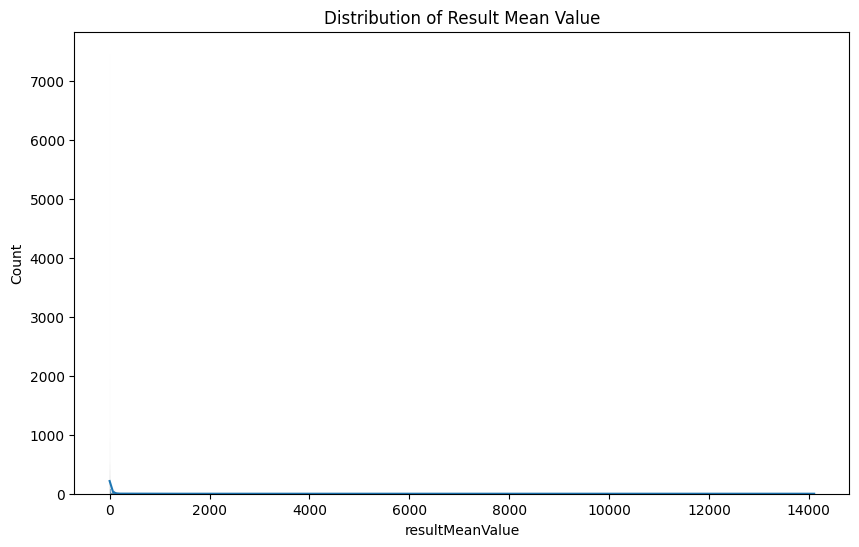

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['resultMeanValue'], kde=True)
plt.title('Distribution of Result Mean Value')
plt.show()

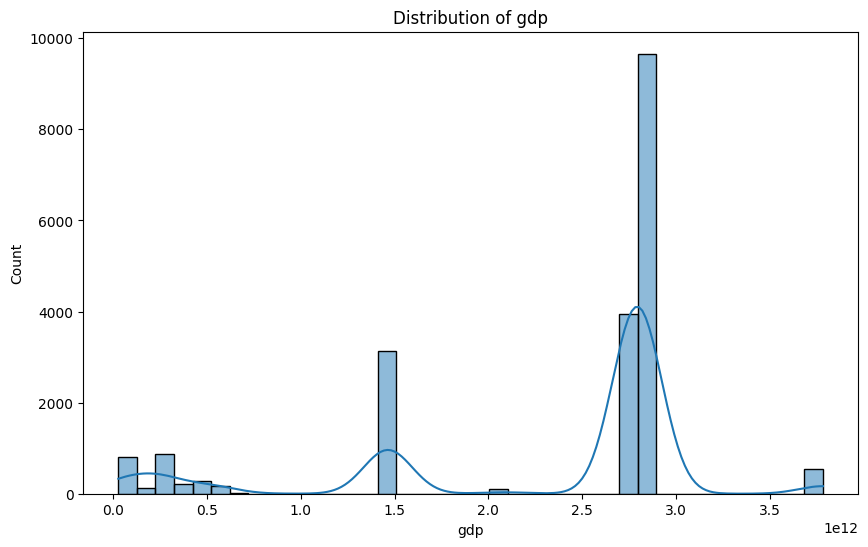

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['gdp'], kde=True)
plt.title('Distribution of gdp')
plt.show()

GDP:
* Distribution: GDP is typically right-skewed, meaning most regions have lower GDP, and only a few regions are significantly wealthier.
* Insight: The skewness in GDP indicates large economic disparities between regions, which could impact various factors like infrastructure and access to clean water.

**Water Quality vs GDP**

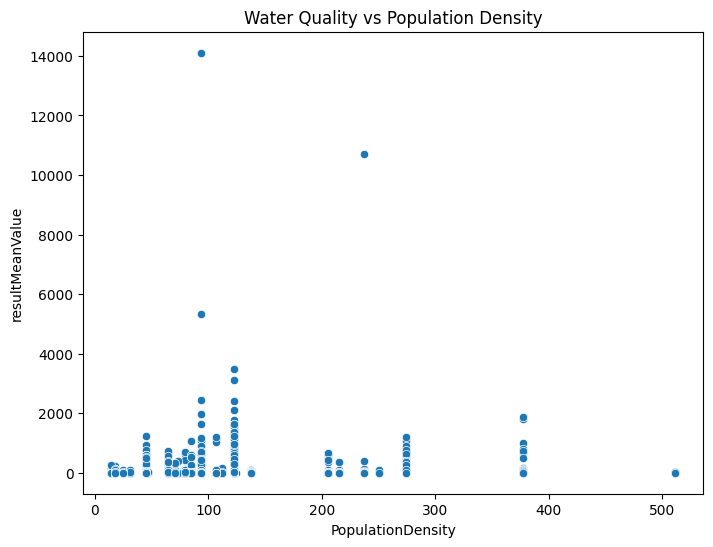

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PopulationDensity', y='resultMeanValue', data=data_cleaned)
plt.title('Water Quality vs Population Density')
plt.show()

* The scatter plot here may show a weak positive trend, where higher GDP correlates with better water quality, but the relationship is not strongly linear.

**Correlation Heatmap**

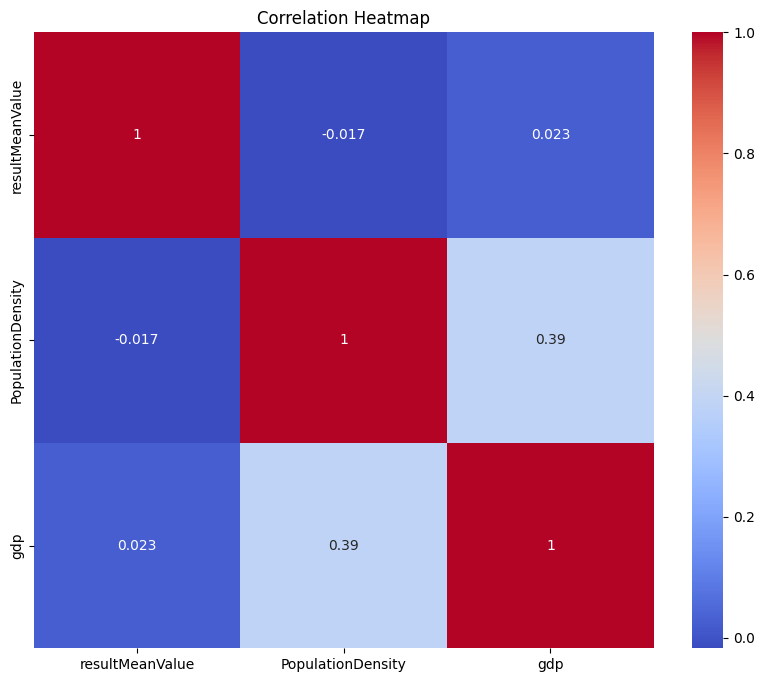

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = data_cleaned[['resultMeanValue', 'PopulationDensity', 'gdp']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

* A heatmap showed the correlations between water quality, GDP, and population density.
* Correlation coefficients help quantify the strength and direction of relationships:
    * Positive correlation: Variables move in the same direction (e.g., if GDP increases, water quality may increase).
    * Negative correlation: Variables move in opposite directions.

In this case, the correlation was moderate, indicating some connection between socio-economic factors and water quality, but other unexplored variables likely play a role.


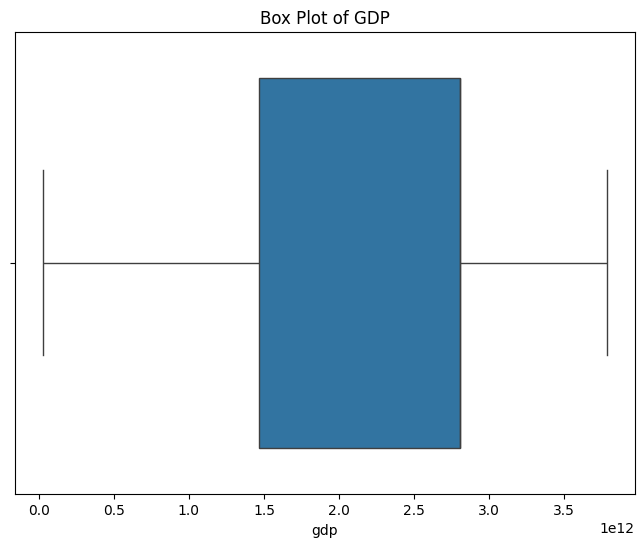

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned['gdp'])
plt.title('Box Plot of GDP')
plt.show()

Box plots provide a visual summary of the distribution, focusing on the central tendency and spread of the data while also highlighting outliers.
* GDP:
   * Distribution and Outliers: A box plot for GDP typically shows a right-skewed distribution, with a few wealthier regions standing out as outliers. The median and quartiles will help illustrate the typical GDP for most regions.
   * Spread: A wide box would indicate high variability in GDP, while a narrow box suggests most regions have similar GDP levels.

# Conclution

1. Distribution Analysis:

* The skewness in the water quality distribution indicates a disparity, with some regions having much better water quality than others.
* Population density and GDP are also skewed, suggesting regional differences in socio-economic factors.

2. Relationships:

* Population Density and Water Quality:
    * While densely populated regions might be expected to have poorer water quality due to pollution, the scatter plot doesn't show a strong trend, indicating that other factors (like policy and infrastructure) may influence water quality more significantly.
* GDP and Water Quality:
    * The weak positive correlation suggests that regions with higher GDP generally have better water quality, but GDP alone is not a definitive indicator.

3. Policy Implications:

For example, if GDP and water quality are positively correlated, regions with lower GDP may need more investment in infrastructure to improve water quality.
  * Regions with low GDP and poor water quality could benefit from targeted interventions (like infrastructure investments).
  * High-population-density areas should also focus on sustainable water management practices, even if a strong correlation wasn’t observed.
